# Búsqueda Aleatoria

El   Algoritmo   de   Búsqueda   Aleatoria   (BA)   consistirá   simplemente   en   generar aleatoriamente  una  solución  en  cada  iteración,  usando  listas  de  nodos  (o  ciudades) candidatos no visitados (ya que no se pueden repetir).  
La  búsqueda aleatoria  completa  debe  ejecutarse  10  veces,  cada  vez  con  una  semilla distinta  (por  tanto,  se  deben  anotar  las  10  semillas  que  se  utilizarán  sistemáticamente), para  el  generador  aleatorio,  y  para  cada  conjunto  de  datos con 1600·n llamadasa  la función de evaluación.

### Librerías
- matplotlib: necesaria para la representación de la solución.
- pandas: necesaria para la representación de resultados.
- random: necesaria para el control de números aleatorios.
- datetime: necesaria para la obtención de una semilla inicial que genere las demás semillas.
- multiprocessing: necesaria para la ejecución concurrente de las soluciones.
- itertools: necesaria para combinar las semillas con los dataset en la ejecución concurrente.
- ipynb: necesaria para cargar la función busqueda_aleatorio de otro fichero. Esto permite la ejecución concurrente en Jupyter.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from random import seed
from random import randint
from datetime import datetime
from multiprocessing import Pool, TimeoutError
import itertools
from ipynb.fs.full.algoritmo import busqueda_aleatoria

### Funciones auxiliares
- cargar_fichero(nombre_fichero): devuelve un array con las ciudades almacenadas en el fichero. [ [ ciudad, posición x , posición y ] [...] ... ]
- dibujar_flecha(A, B): dibuja una flecha entre el punto A y B apuntando a B. 
- representacion(camino, nombre, distancia): representa las ciudades y el camino calculado.
- representacion_datos(result,nombre): representa la solución obtenida de la ejecución concurrente de un dataset.

In [2]:
def cargar_fichero(nombre_fichero):
    
    fichero = open( "../Dataset/" + nombre_fichero + ".tsp", 'r')
    
    for i in range(3):
        fichero.readline()
        
    numero_de_ciudades = fichero.readline().strip().split()[1]
    
    for i in range(2):
        fichero.readline()
        
    ciudades = []
    for i in range(0, int(numero_de_ciudades)):
        ciudad,x,y = fichero.readline().strip().split()[:]
        ciudades.append([int(ciudad),float(x),float(y)])  
        
    fichero.close()
    
    return ciudades

In [3]:
def dibujar_flecha(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=1.3, length_includes_head=True)

In [4]:
def representacion(camino, nombre, distancia):
    
    plt.figure(figsize=(10,10))
    
    for i in range(len(camino)):
        if(i == 0):
            plt.plot(camino[i][1], camino[i][2] , "o", color="green")
        else:
            plt.plot(camino[i][1], camino[i][2] , "*", color="red")
        
        if(i<len(camino)-1):
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[i+1][1], camino[i+1][2]])
        else:
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[0][1], camino[0][2]])
    
    plt.title(nombre + " : " + str(distancia))

In [5]:
def representacion_datos(result,nombre):
    semilla_coste = pd.DataFrame(columns=["Semilla","Coste","Nº de evaluaciones"])
    for i in range(10):
        semilla_coste.loc[len(semilla_coste)] = [semillas[i],result[i][1],1600*len(dataset)]
    display(semilla_coste)

    print("Media coste: ", semilla_coste[['Coste']].mean()[0])
    print("Desviación típica coste: ", semilla_coste[['Coste']].std()[0])
    print("Media nº de evaluaciones: ", semilla_coste[['Nº de evaluaciones']].mean()[0])
    print("Desviación típica nº de evaluaciones: ", semilla_coste[['Nº de evaluaciones']].std()[0])


    print()
    print("Representación de la mejor solución: ")
    indice = semilla_coste[['Coste']].idxmin()[0]


    representacion(result[indice][0], nombre, result[indice][1])

### Función para calcular el coste
Función aparte para calcular el coste de una solución, esta fue desarrollada únicamente para comprobar que las soluciones obtenidas son correctas.

In [6]:
def calcular_coste(camino):
    coste = 0
    for indice in range(len(camino)):
        if(indice < len(camino)-1):
            coste += distancia_euclidea(camino[indice],camino[indice+1])
        else:
            coste += distancia_euclidea(camino[indice],camino[0])
    return coste

### Lectura de ficheros

In [7]:
st70 = cargar_fichero("st70")
ch130 = cargar_fichero("ch130")
a280 = cargar_fichero("a280")
p654 = cargar_fichero("p654")
vm1084 = cargar_fichero("vm1084")
vm1748 = cargar_fichero("vm1748")

Como el enunciado especifica que empecemos con la primera ciudad, con este algoritmo, independientemente de cuantas veces lo ejecutemos nos devolverá la misma solución. Por lo que se ejecutara solo una vez.

### Generación de semillas

In [8]:
semillas = []
dt = datetime.now()
for i in range(10):
    semillas.append(randint(0,dt.microsecond))
print("Semillas generadas:")
print(semillas)

Semillas generadas:
[125092, 49636, 106909, 22085, 2007, 99303, 4097, 64091, 65243, 78989]


#### st70

,Semilla,Coste,Nº de evaluaciones
0,125092.0,2900.0,112000.0
1,49636.0,2710.0,112000.0
2,106909.0,2855.0,112000.0
3,22085.0,2854.0,112000.0
4,2007.0,2802.0,112000.0
5,99303.0,2868.0,112000.0
6,4097.0,2826.0,112000.0
7,64091.0,2806.0,112000.0
8,65243.0,2831.0,112000.0
9,78989.0,2859.0,112000.0


Media coste:  2831.1
Desviación típica coste:  51.80186611825228
Media nº de evaluaciones:  112000.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


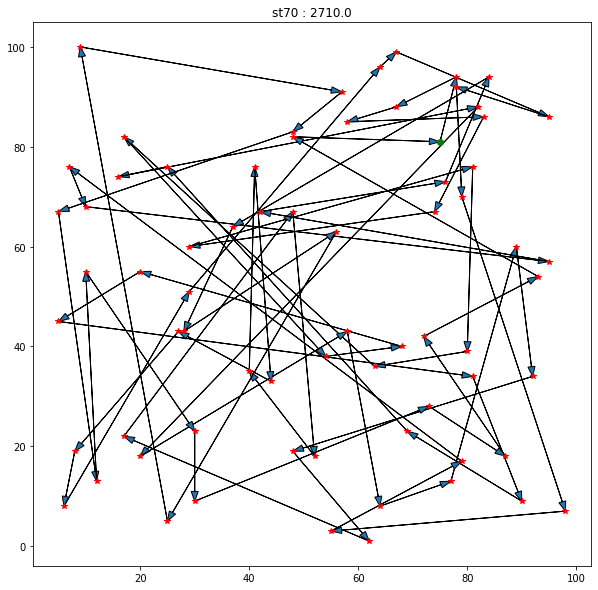

In [10]:
dataset = st70

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"st70")

#### ch130


,Semilla,Coste,Nº de evaluaciones
0,125092.0,38643.0,208000.0
1,49636.0,38564.0,208000.0
2,106909.0,38389.0,208000.0
3,22085.0,39174.0,208000.0
4,2007.0,37956.0,208000.0
5,99303.0,38683.0,208000.0
6,4097.0,39179.0,208000.0
7,64091.0,38979.0,208000.0
8,65243.0,38962.0,208000.0
9,78989.0,39010.0,208000.0


Media coste:  38753.9
Desviación típica coste:  385.85272089519106
Media nº de evaluaciones:  208000.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


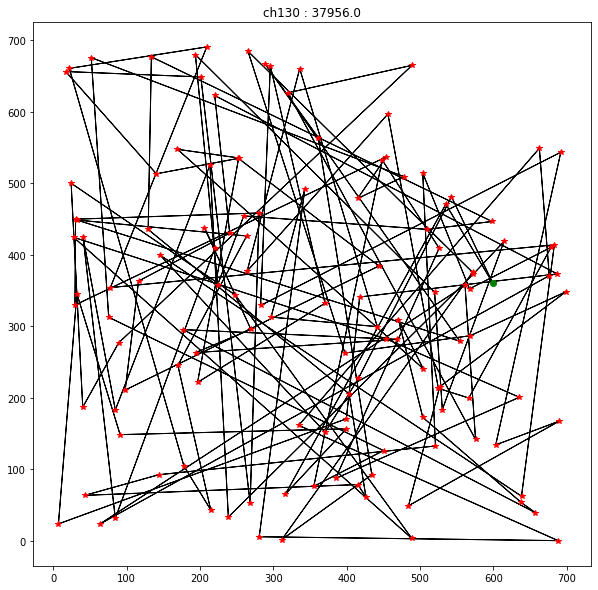

In [11]:
dataset = ch130

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"ch130")

#### a280

,Semilla,Coste,Nº de evaluaciones
0,125092.0,29612.0,448000.0
1,49636.0,29897.0,448000.0
2,106909.0,29438.0,448000.0
3,22085.0,29631.0,448000.0
4,2007.0,29739.0,448000.0
5,99303.0,29607.0,448000.0
6,4097.0,29150.0,448000.0
7,64091.0,29680.0,448000.0
8,65243.0,29548.0,448000.0
9,78989.0,29753.0,448000.0


Media coste:  29605.5
Desviación típica coste:  202.65967641453602
Media nº de evaluaciones:  448000.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


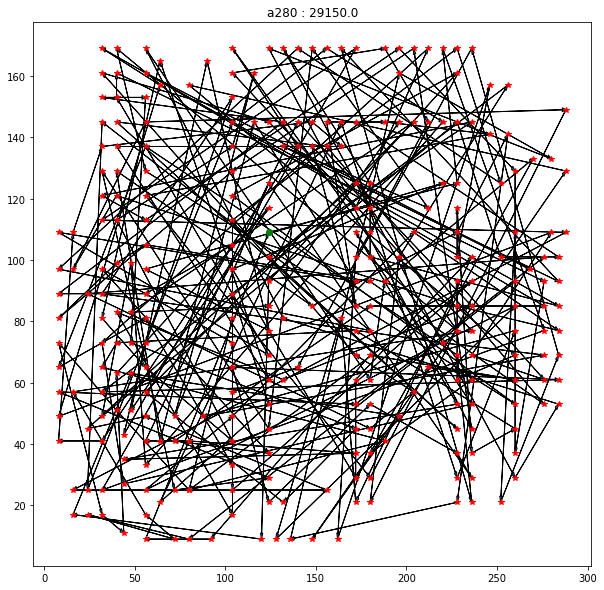

In [12]:
dataset = a280

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"a280")

#### p654

,Semilla,Coste,Nº de evaluaciones
0,125092.0,1805333.0,1046400.0
1,49636.0,1803574.0,1046400.0
2,106909.0,1819036.0,1046400.0
3,22085.0,1825159.0,1046400.0
4,2007.0,1811913.0,1046400.0
5,99303.0,1815906.0,1046400.0
6,4097.0,1814903.0,1046400.0
7,64091.0,1828401.0,1046400.0
8,65243.0,1813336.0,1046400.0
9,78989.0,1805003.0,1046400.0


Media coste:  1814256.4
Desviación típica coste:  8370.749683670316
Media nº de evaluaciones:  1046400.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


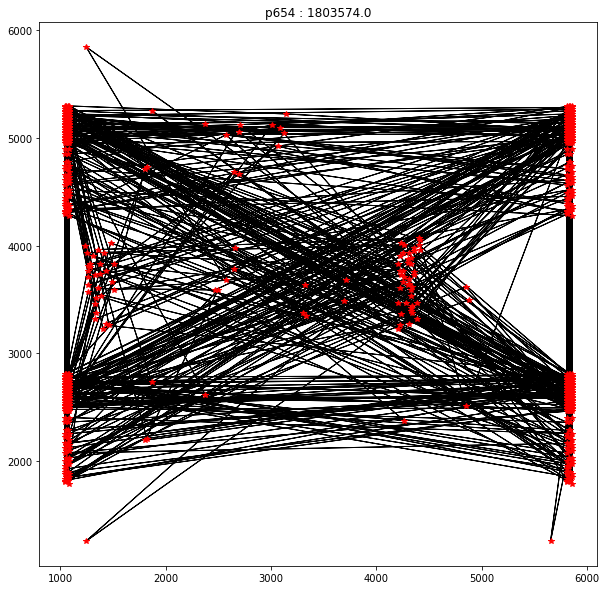

In [13]:
dataset = p654

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"p654")

#### vm1084

,Semilla,Coste,Nº de evaluaciones
0,125092.0,7872148.0,1734400.0
1,49636.0,7977656.0,1734400.0
2,106909.0,7934694.0,1734400.0
3,22085.0,7991997.0,1734400.0
4,2007.0,7999025.0,1734400.0
5,99303.0,7915797.0,1734400.0
6,4097.0,7942229.0,1734400.0
7,64091.0,7973481.0,1734400.0
8,65243.0,7971138.0,1734400.0
9,78989.0,7929875.0,1734400.0


Media coste:  7950804.0
Desviación típica coste:  39234.64742913958
Media nº de evaluaciones:  1734400.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


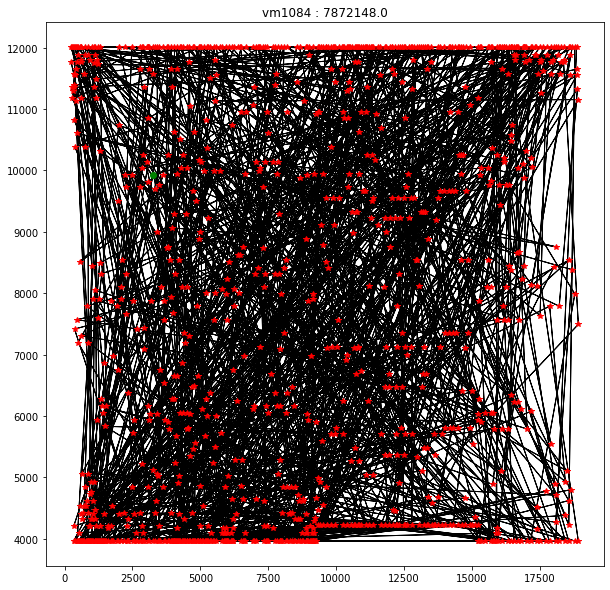

In [14]:
dataset = vm1084

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"vm1084")

#### vm1748

,Semilla,Coste,Nº de evaluaciones
0,125092.0,14165381.0,2796800.0
1,49636.0,14192419.0,2796800.0
2,106909.0,14155615.0,2796800.0
3,22085.0,14079152.0,2796800.0
4,2007.0,14086997.0,2796800.0
5,99303.0,14141143.0,2796800.0
6,4097.0,14170080.0,2796800.0
7,64091.0,14165264.0,2796800.0
8,65243.0,14146020.0,2796800.0
9,78989.0,14189545.0,2796800.0


Media coste:  14149161.6
Desviación típica coste:  38504.76577198666
Media nº de evaluaciones:  2796800.0
Desviación típica nº de evaluaciones:  0.0

Representación de la mejor solución: 


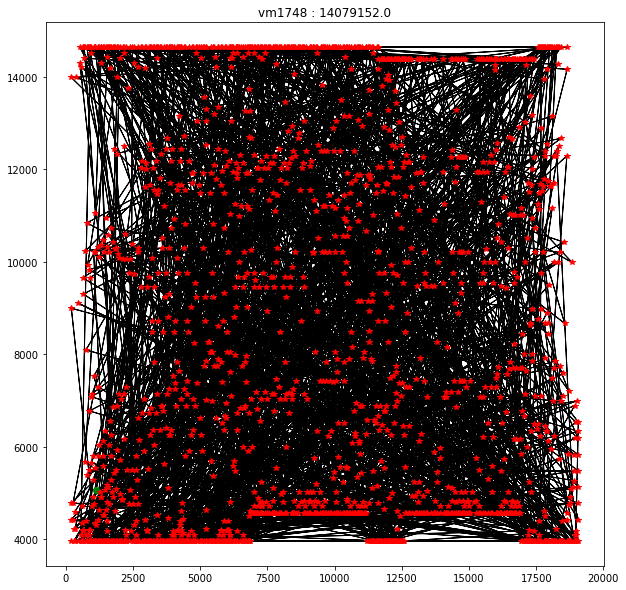

In [15]:
dataset = vm1748

with Pool(processes=5) as pool:
    result = pool.starmap(busqueda_aleatoria,  itertools.product(semillas,[dataset]) )
    
representacion_datos(result,"vm1748")